In [1]:
# imports
import csv
import statistics
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from math import pi
import math

In [1]:
def file_exists(file):
    return os.path.isfile(file)

In [3]:
# base-path file
data_path = "data/"

# dataset filename
semmem_file = data_path + "semmem-vs-memcat.csv"
memcat_file = data_path + "memcat.csv"
lamem_file = data_path + "lamem.csv"
figrim_file = data_path + "figrim.csv"

In [4]:
def get_avg(dataset):
    return statistics.mean(dataset)

In [5]:
def read_dataset(dataset_name):
    if dataset_name == "semmem":
        return read_semmem()
    elif dataset_name == "memcat":
        return read_memcat()
    elif dataset_name == "lamem":
        return read_lamem()
    elif dataset_name == "figrim":
        return read_figrim()
    else:
        return "dataset not found"

In [6]:
def read_semmem():
    semmem = []
    sub_memcat = []

    if file_exists(not semmem_file):
        return semmem, sub_memcat

    with open(semmem_file, newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            semmem.append(
                {
                    "rank": float(row["rank_semmem"]),
                    "category": row["category"],
                    "image": row["\ufeffSemMem"],
                }
            )

            if row["rank_memcat"] == "":
                continue
            sub_memcat.append(
                {
                    "rank": float(row["rank_memcat"]),
                    "category": row["category"],
                    "image": row["MemCat"],
                }
            )
    return semmem, sub_memcat


def read_memcat():
    memcat = []

    if file_exists(not memcat_file):
        return memcat

    with open(memcat_file, newline="") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            memcat.append(
                {
                    "rank": float(row["rank"]),
                    "category": row["category"],
                    "image": row["image_file"],
                }
            )

    return memcat

In [7]:
# read data from dataset
semmem, sub_memcat = read_dataset("semmem")
memcat = read_dataset("memcat")

In [8]:
memcat_category = ["animal", "food", "landscape", "sports", "vehicle"]
semmem_category = ["animal", "food", "landscape", "sports", "vehicle", "iran"]

In [9]:
memcat_category_rank = {
    "animal": [],
    "food": [],
    "landscape": [],
    "sports": [],
    "vehicle": [],
}

sub_memcat_category_rank = {
    "animal": [],
    "food": [],
    "landscape": [],
    "sports": [],
    "vehicle": [],
}

semmem_category_rank = {
    "animal": [],
    "food": [],
    "landscape": [],
    "sports": [],
    "vehicle": [],
    "iran": [],
}

In [10]:
for img in semmem:
    for cat in semmem_category:
        if img["category"] == cat:
            semmem_category_rank[cat].append(img["rank"])

In [11]:
for img in memcat:
    for cat in memcat_category_rank:
        if img["category"] == cat:
            memcat_category_rank[cat].append(img["rank"])

In [12]:
for img in sub_memcat:
    for cat in memcat_category:
        if img["category"] == cat:
            sub_memcat_category_rank[cat].append(img["rank"])

In [13]:
memcat_means = []
for cat in memcat_category:
    memcat_means.append(get_avg(memcat_category_rank[cat]))

sub_memcat_means = []
for cat in memcat_category:
    sub_memcat_means.append(get_avg(sub_memcat_category_rank[cat]))

semmem_means = []
for cat in semmem_category:
    semmem_means.append(get_avg(semmem_category_rank[cat]))

# make same size of category
memcat_means.append(0.0)
sub_memcat_means.append(0.0)

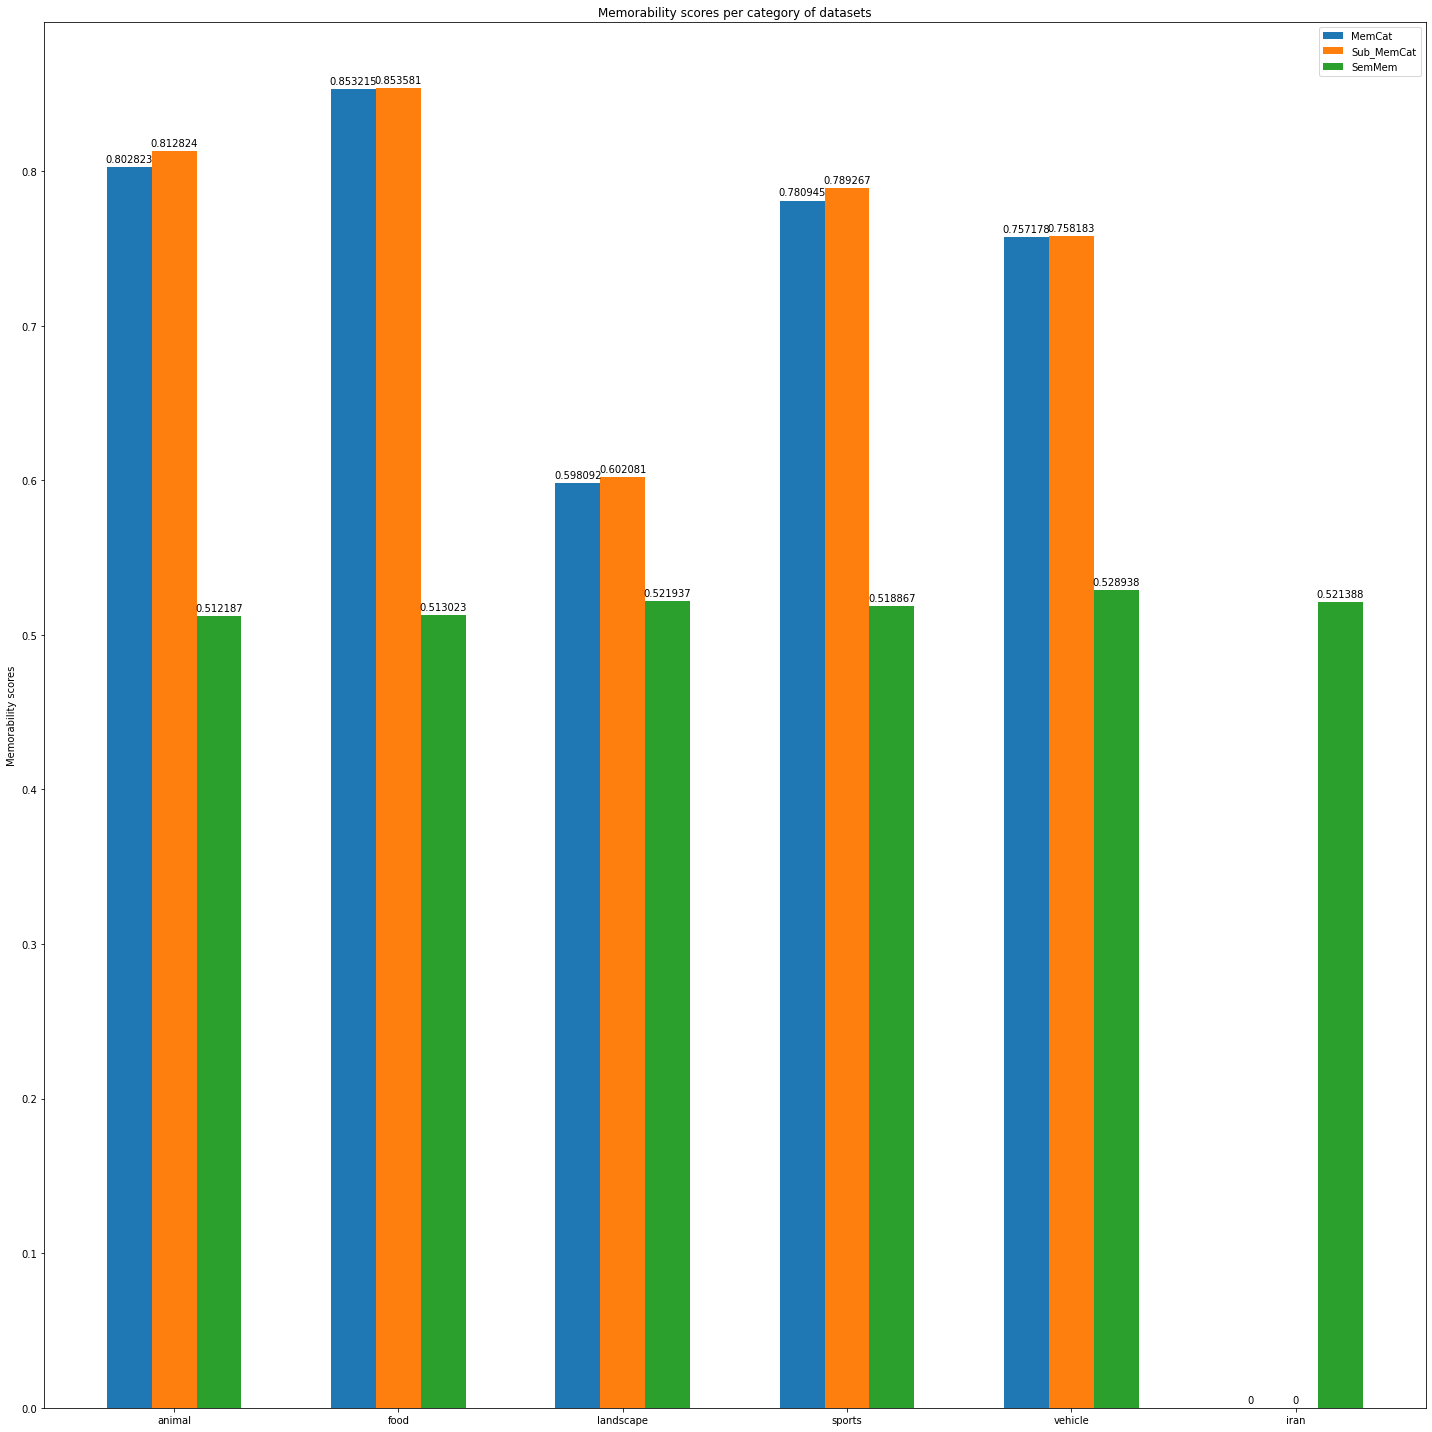

In [14]:
x = np.arange(len(semmem_category))
width = 0.20

fig, ax = plt.subplots(figsize=(20, 20))
rects1 = ax.bar(x - width, memcat_means, width, label="MemCat")
rects2 = ax.bar(x, sub_memcat_means, width, label="Sub_MemCat")
rects3 = ax.bar(x + width, semmem_means, width, label="SemMem")

ax.set_ylabel("Memorability scores")
ax.set_title("Memorability scores per category of datasets")
ax.set_xticks(x, semmem_category)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.savefig("compare-dataset-category.jpg")
plt.show()

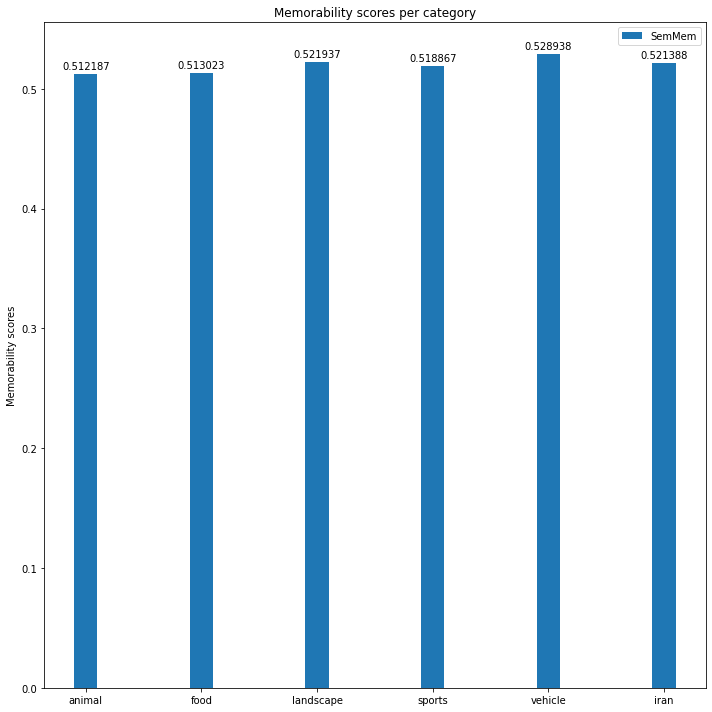

In [15]:
x = np.arange(len(semmem_category))

fig, ax = plt.subplots(figsize=(10, 10))
rects = ax.bar(x, semmem_means, width, label="SemMem")

ax.set_ylabel("Memorability scores")
ax.set_title("Memorability scores per category")
ax.set_xticks(x, semmem_category)
ax.legend()

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.savefig("semmem-dataset-category.jpg")
plt.show()

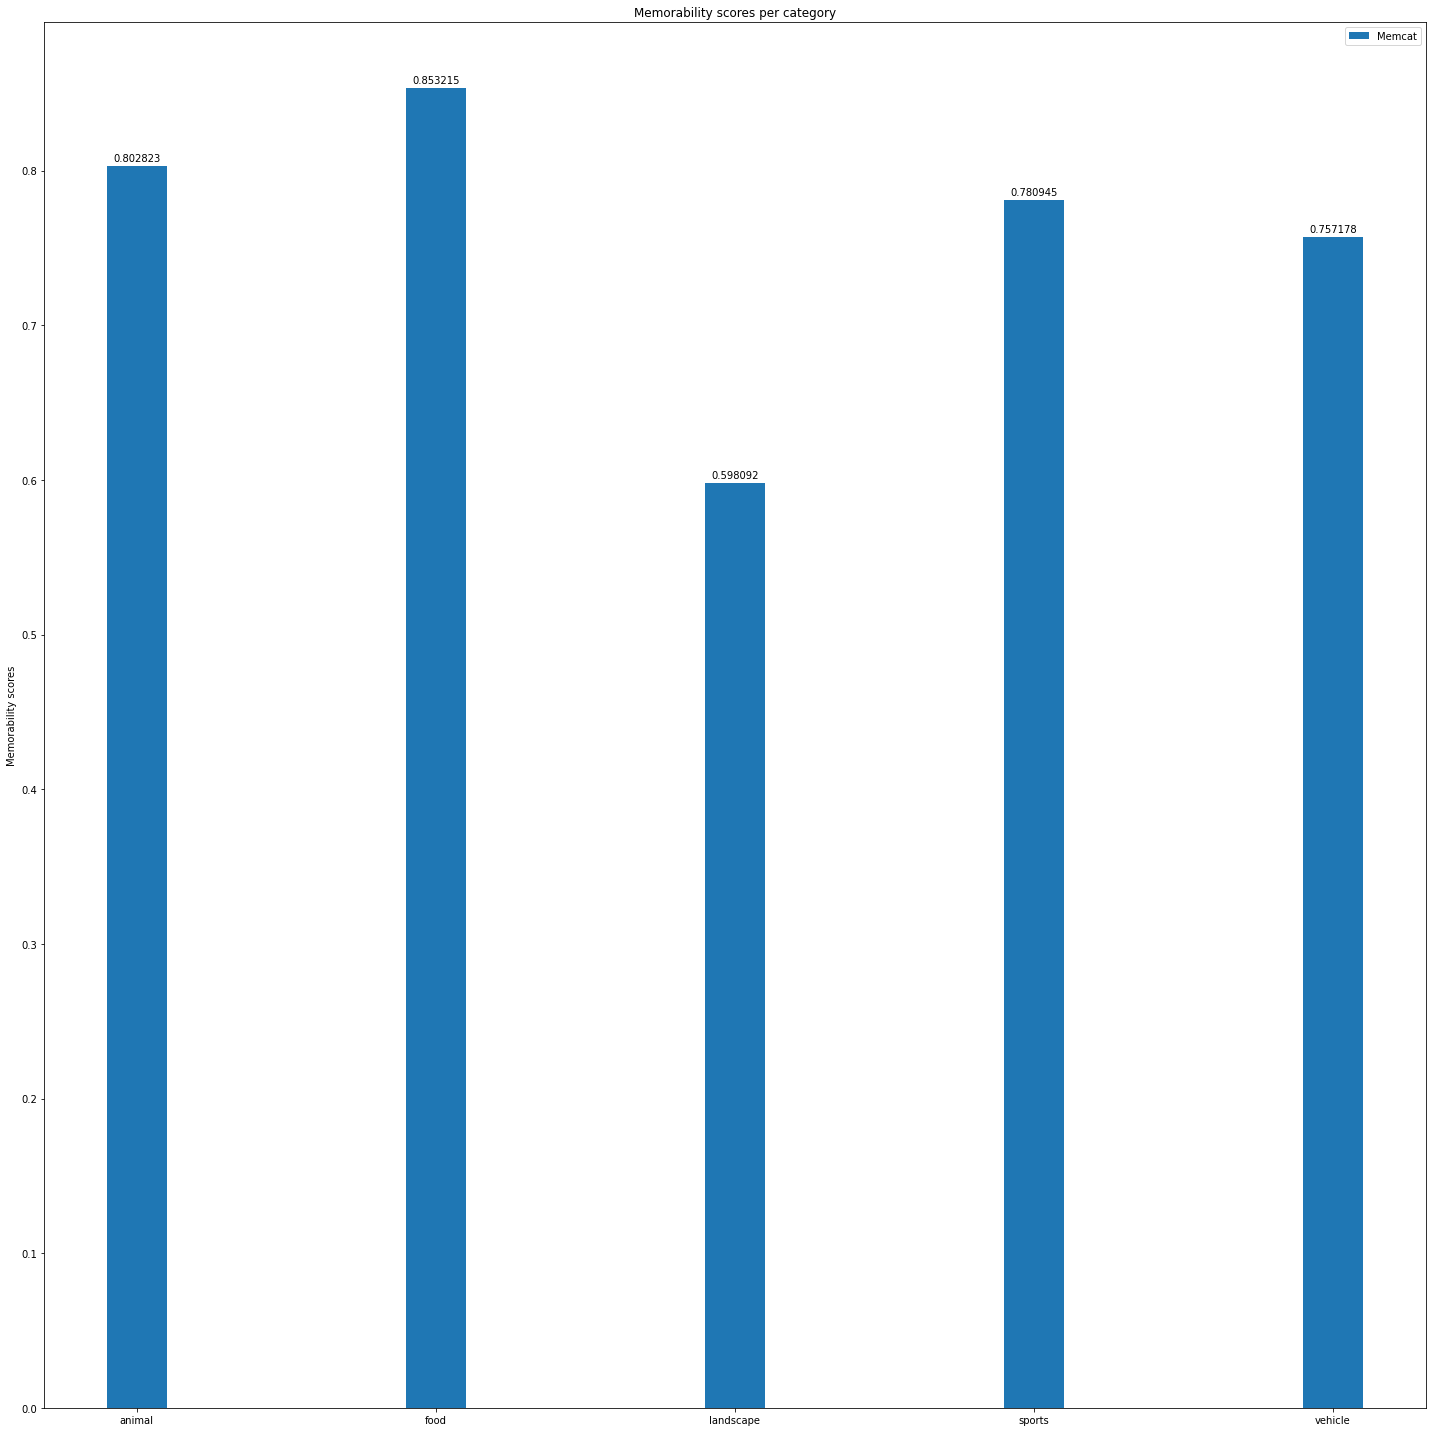

In [16]:
memcat_means = memcat_means[0:5]
x = np.arange(len(memcat_category))

fig, ax = plt.subplots(figsize=(20, 20))
rects = ax.bar(x, memcat_means, width, label="Memcat")

ax.set_ylabel("Memorability scores")
ax.set_title("Memorability scores per category")
ax.set_xticks(x, memcat_category)
ax.legend()

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.savefig("memcat-dataset-category.jpg")
plt.show()

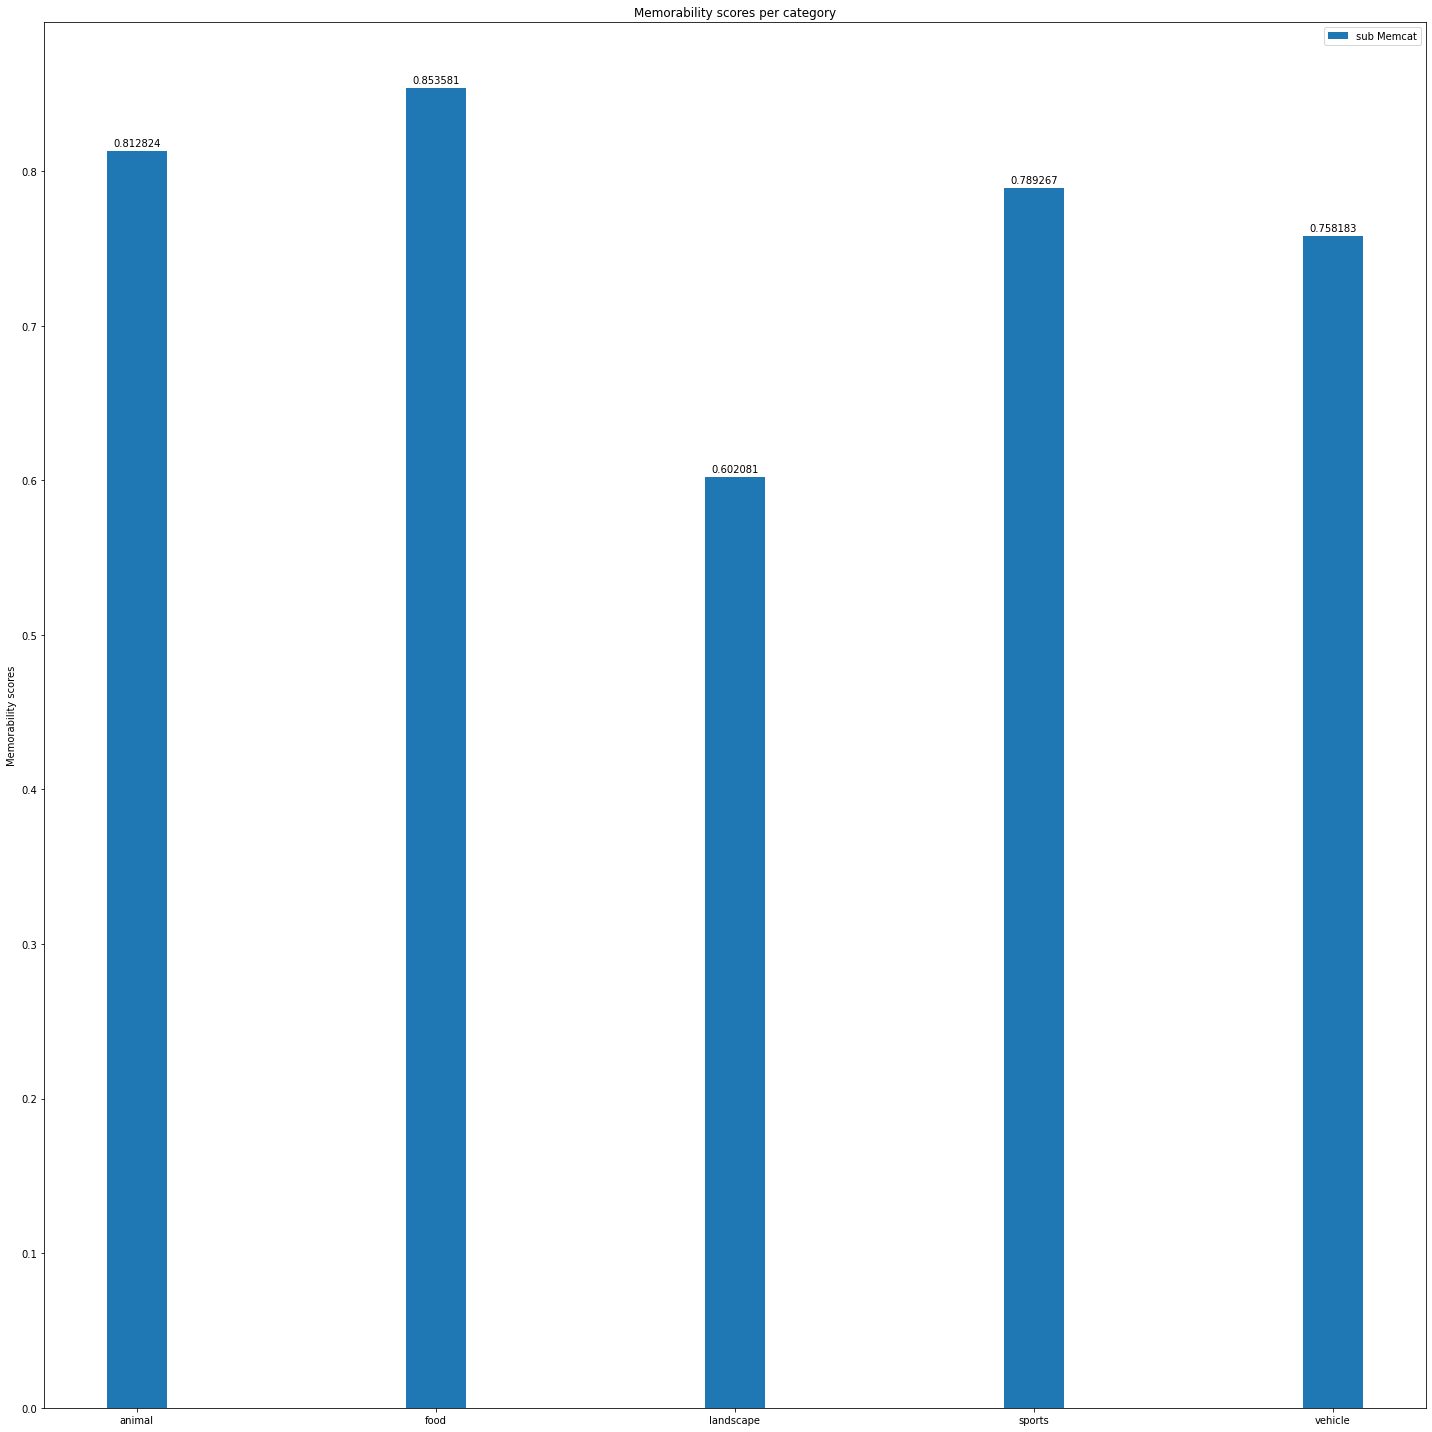

In [17]:
sub_memcat_means = sub_memcat_means[0:5]
x = np.arange(len(memcat_category))

fig, ax = plt.subplots(figsize=(20, 20))
rects = ax.bar(x, sub_memcat_means, width, label="sub Memcat")

ax.set_ylabel("Memorability scores")
ax.set_title("Memorability scores per category")
ax.set_xticks(x, memcat_category)
ax.legend()

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.savefig("sub-memcat-dataset-category.jpg")
plt.show()

In [18]:
print("semmem")
counter = 0
min = {"category": "", "rank": 1}
max = {"category": "", "rank": 0}
for cat in semmem_category:
    if max["rank"] < semmem_means[counter]:
        max["category"] = cat
        max["rank"] = semmem_means[counter]
    elif min["rank"] > semmem_means[counter]:
        min["category"] = cat
        min["rank"] = semmem_means[counter]

    print(cat, ": ", semmem_means[counter])
    counter += 1

print("max -> ", max["category"], ": ", max["rank"])
print("min -> ", min["category"], ": ", min["rank"])

semmem
animal :  0.5121871399578314
food :  0.5130231023192771
landscape :  0.5219365734939759
sports :  0.5188665764036144
vehicle :  0.5289381580361446
iran :  0.5213877865647059
max ->  vehicle :  0.5289381580361446
min ->  sports :  0.5188665764036144


In [19]:
print("memcat")
counter = 0
min = {"category": "", "rank": 1}
max = {"category": "", "rank": 0}
for cat in memcat_category:
    if max["rank"] < memcat_means[counter]:
        max["category"] = cat
        max["rank"] = memcat_means[counter]
    elif min["rank"] > memcat_means[counter]:
        min["category"] = cat
        min["rank"] = memcat_means[counter]

    print(cat, ": ", memcat_means[counter])
    counter += 1

print("max -> ", max["category"], ": ", max["rank"])
print("min -> ", min["category"], ": ", min["rank"])

memcat
animal :  0.802823179861
food :  0.853215137762
landscape :  0.598092117889
sports :  0.7809453237955
vehicle :  0.757178028252
max ->  food :  0.853215137762
min ->  landscape :  0.598092117889


In [20]:
print("submemcat")
counter = 0
min = {"category": "", "rank": 1}
max = {"category": "", "rank": 0}
for cat in memcat_category:
    if max["rank"] < sub_memcat_means[counter]:
        max["category"] = cat
        max["rank"] = sub_memcat_means[counter]
    elif min["rank"] > sub_memcat_means[counter]:
        min["category"] = cat
        min["rank"] = sub_memcat_means[counter]

    print(cat, ": ", memcat_means[counter])
    counter += 1

print("max -> ", max["category"], ": ", max["rank"])
print("min -> ", min["category"], ": ", min["rank"])

submemcat
animal :  0.802823179861
food :  0.853215137762
landscape :  0.598092117889
sports :  0.7809453237955
vehicle :  0.757178028252
max ->  food :  0.8535805301385542
min ->  landscape :  0.6020806463795181


In [21]:
memcat_sorted = sorted(memcat, key=lambda x: x["rank"])
memcat_sorted_reverse = sorted(memcat, key=lambda x: x["rank"], reverse=True)

In [22]:
semmem_sorted = sorted(semmem, key=lambda x: x["rank"])
semmem_sorted_reverse = sorted(semmem, key=lambda x: x["rank"], reverse=True)

In [23]:
sub_memcat_sorted = sorted(sub_memcat, key=lambda x: x["rank"])
sub_memcat_sorted_reverse = sorted(sub_memcat, key=lambda x: x["rank"], reverse=True)

In [24]:
image_shown_per_col = 5
image_shown_per_row = 5
image_shown_count = image_shown_per_col * image_shown_per_row

<Figure size 432x288 with 0 Axes>

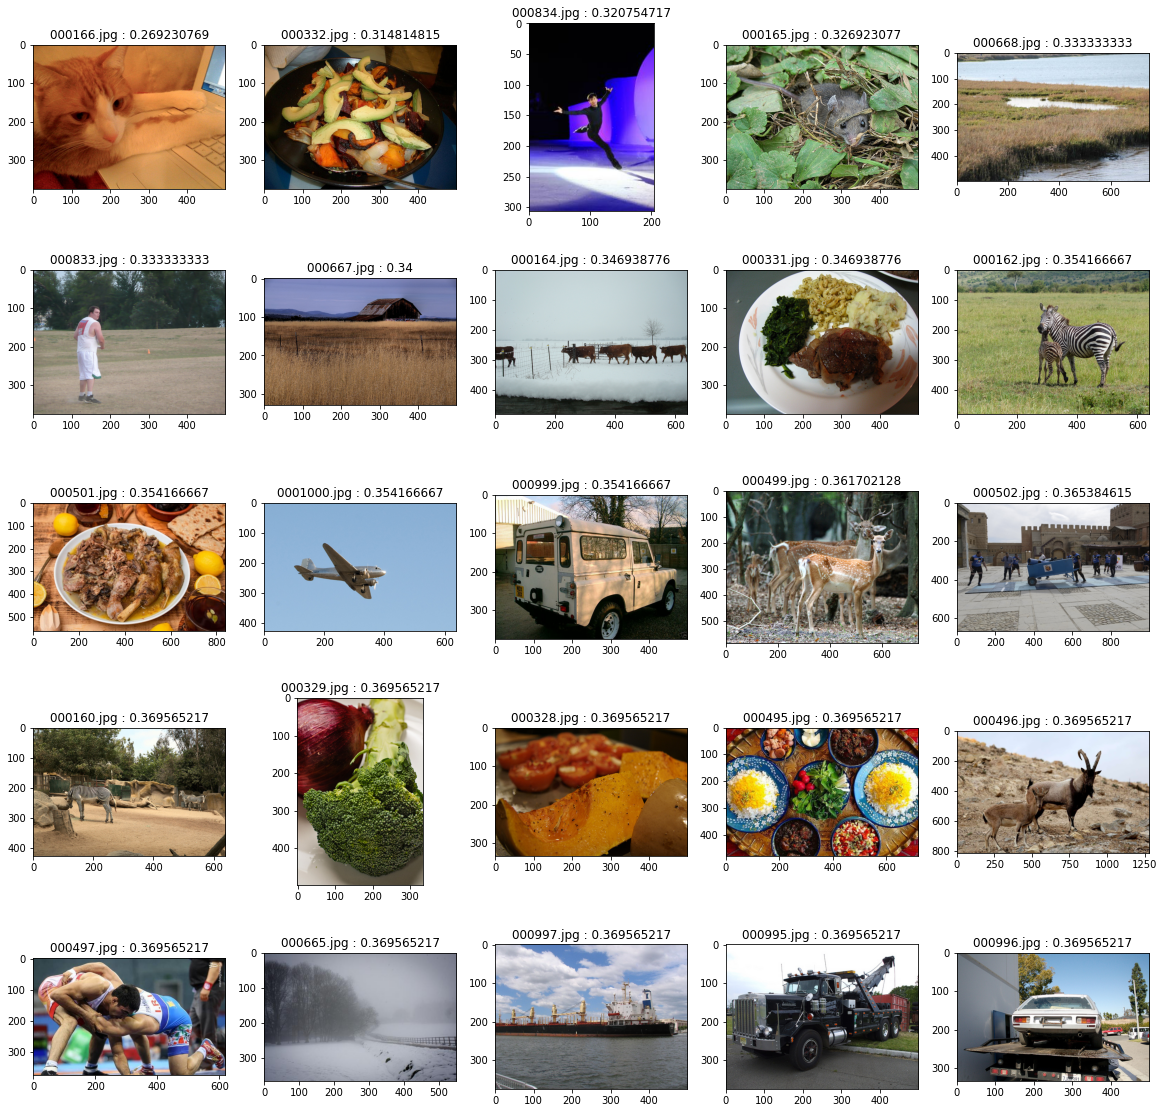

In [25]:
plt.figure()
_, fig = plt.subplots(image_shown_per_col, image_shown_per_row, figsize=(20, 20))
fig = fig.flatten()
i = 0

for f in fig:
    f.imshow(mpimg.imread("images/" + semmem_sorted[i]["image"]))
    f.title.set_text(semmem_sorted[i]["image"] + " : " + str(semmem_sorted[i]["rank"]))

    i += 1

plt.savefig("forgettable.jpg")

<Figure size 432x288 with 0 Axes>

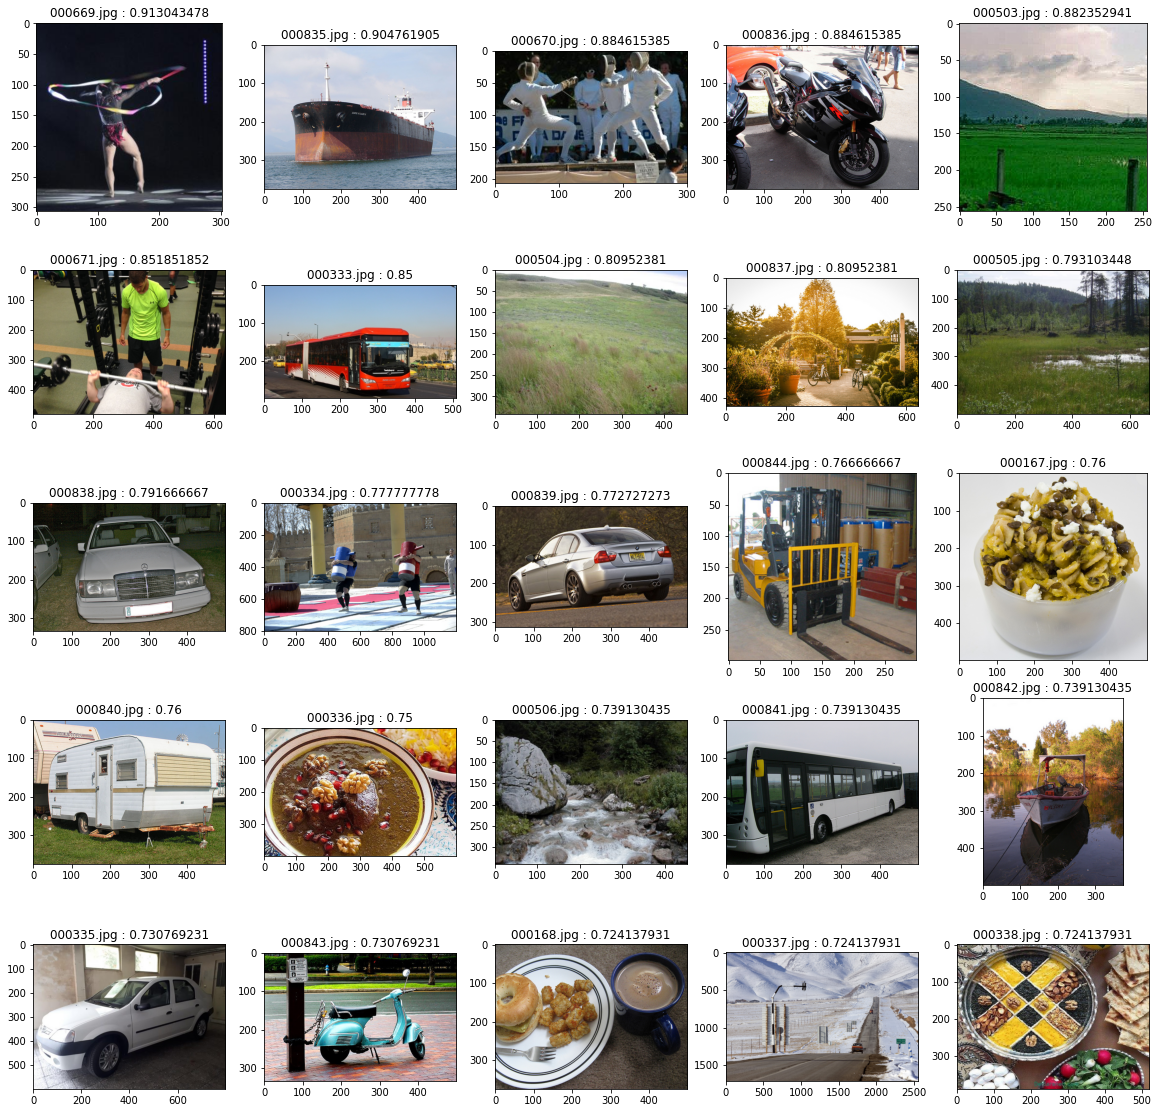

In [26]:
plt.figure()
_, fig = plt.subplots(image_shown_per_col, image_shown_per_row, figsize=(20, 20))
fig = fig.flatten()
i = 0

for f in fig:
    f.imshow(mpimg.imread("images/" + semmem_sorted_reverse[i]["image"]))
    f.title.set_text(
        semmem_sorted_reverse[i]["image"]
        + " : "
        + str(semmem_sorted_reverse[i]["rank"])
    )

    i += 1

plt.savefig("memorable.jpg")

## All Color with weight


In [27]:
semmem_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [28]:
for image in semmem:
    img = cv2.imread("images/" + image["image"])

    semmem_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    semmem_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    semmem_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

semmem_colors["b"] /= len(semmem)
semmem_colors["g"] /= len(semmem)
semmem_colors["r"] /= len(semmem)

In [29]:
semmem_colors

{'r': 64.15998899764234, 'g': 61.31141167312398, 'b': 54.36223290123974}

In [30]:
memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [31]:
for image in memcat:
    img = cv2.imread("memcat/" + image["image"])

    memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

memcat_colors["b"] /= len(memcat)
memcat_colors["g"] /= len(memcat)
memcat_colors["r"] /= len(memcat)

In [32]:
memcat_colors

{'r': 93.48466602888564, 'g': 90.149081112153, 'b': 79.18897427310931}

In [33]:
sub_memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [34]:
for image in sub_memcat:
    img = cv2.imread("memcat/" + image["image"])

    sub_memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    sub_memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    sub_memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

sub_memcat_colors["b"] /= len(sub_memcat)
sub_memcat_colors["g"] /= len(sub_memcat)
sub_memcat_colors["r"] /= len(sub_memcat)

In [35]:
sub_memcat_colors

{'r': 94.05121777533992, 'g': 89.82888544682288, 'b': 78.5660371874222}

# RGB


## top Color with weight


In [36]:
image_count_for_compare = 50

In [37]:
semmem_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [38]:
for image in semmem_sorted_reverse[:image_count_for_compare]:
    img = cv2.imread("images/" + image["image"])

    semmem_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0))
    semmem_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0))
    semmem_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0))

semmem_colors["b"] /= image_count_for_compare
semmem_colors["g"] /= image_count_for_compare
semmem_colors["r"] /= image_count_for_compare

In [39]:
semmem_colors

{'r': 122.59000790777492, 'g': 118.21788138150033, 'b': 104.10827933958288}

In [40]:
memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [41]:
for image in memcat_sorted_reverse[:image_count_for_compare]:
    img = cv2.imread("memcat/" + image["image"])

    memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

memcat_colors["b"] /= image_count_for_compare
memcat_colors["g"] /= image_count_for_compare
memcat_colors["r"] /= image_count_for_compare

In [42]:
memcat_colors

{'r': 140.26248465709597, 'g': 113.01931244411922, 'b': 79.89271355036715}

In [43]:
sub_memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [44]:
for image in sub_memcat_sorted_reverse[:image_count_for_compare]:
    img = cv2.imread("memcat/" + image["image"])

    sub_memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    sub_memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    sub_memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

sub_memcat_colors["b"] /= image_count_for_compare
sub_memcat_colors["g"] /= image_count_for_compare
sub_memcat_colors["r"] /= image_count_for_compare

In [45]:
sub_memcat_colors

{'r': 132.6930671378182, 'g': 109.78010843873444, 'b': 87.0262117105208}

## bottom Color with weight


In [46]:
image_count_for_compare = 50

In [47]:
semmem_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [48]:
for image in semmem_sorted[:image_count_for_compare]:
    img = cv2.imread("images/" + image["image"])

    semmem_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0))
    semmem_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0))
    semmem_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0))

semmem_colors["b"] /= image_count_for_compare
semmem_colors["g"] /= image_count_for_compare
semmem_colors["r"] /= image_count_for_compare

In [49]:
semmem_colors

{'r': 127.88430173120626, 'g': 119.26991472415753, 'b': 105.05609510307082}

In [50]:
memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [51]:
for image in memcat_sorted[:image_count_for_compare]:
    img = cv2.imread("memcat/" + image["image"])

    memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

memcat_colors["b"] /= image_count_for_compare
memcat_colors["g"] /= image_count_for_compare
memcat_colors["r"] /= image_count_for_compare

In [52]:
memcat_colors

{'r': 31.54814539853084, 'g': 34.06245449583247, 'b': 32.25547655193893}

In [53]:
sub_memcat_colors = {
    "r": 0,
    "g": 0,
    "b": 0,
}

In [54]:
for image in sub_memcat_sorted[:image_count_for_compare]:
    img = cv2.imread("memcat/" + image["image"])

    sub_memcat_colors["b"] += get_avg(np.average(img[:, :, 0], axis=0)) * image["rank"]
    sub_memcat_colors["g"] += get_avg(np.average(img[:, :, 1], axis=0)) * image["rank"]
    sub_memcat_colors["r"] += get_avg(np.average(img[:, :, 2], axis=0)) * image["rank"]

sub_memcat_colors["b"] /= image_count_for_compare
sub_memcat_colors["g"] /= image_count_for_compare
sub_memcat_colors["r"] /= image_count_for_compare

In [55]:
sub_memcat_colors

{'r': 53.42625339803815, 'g': 56.57128595511579, 'b': 52.7053122821586}

# HSI


In [56]:
def RGB_TO_HSI(img):

    with np.errstate(divide="ignore", invalid="ignore"):

        # Load image with 32 bit floats as variable type
        bgr = np.float32(img) / 255

        # Separate color channels
        blue = bgr[:, :, 0]
        green = bgr[:, :, 1]
        red = bgr[:, :, 2]

        # Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        # Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        # Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = (
                        0.5
                        * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j]))
                        / math.sqrt(
                            (red[i][j] - green[i][j]) ** 2
                            + ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j]))
                        )
                    )
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        # Merge channels into picture and return image
        hsi = cv2.merge(
            (
                calc_hue(red, blue, green),
                calc_saturation(red, blue, green),
                calc_intensity(red, blue, green),
            )
        )
        return hsi

In [57]:
def remove_nan(mylist):
    result_list = []
    for i in mylist:
        if not math.isnan(i):
            result_list.append(i)

    return result_list

## top Color with weight


In [58]:
image_count_for_compare_hsi = 50

In [59]:
semmem_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [60]:
counter = 0

for image in semmem_sorted_reverse:
    img = cv2.imread("images/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        semmem_colors_hsi["h"] += get_avg(temp_hue)
        semmem_colors_hsi["s"] += get_avg(temp_saturation)
        semmem_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

semmem_colors_hsi["h"] /= counter
semmem_colors_hsi["s"] /= counter
semmem_colors_hsi["i"] /= counter

In [61]:
semmem_colors_hsi

{'h': 1.8084180760383606, 's': 0.22040975704789162, 'i': 0.40043277174234393}

In [62]:
memcat_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [63]:
counter = 0

for image in memcat_sorted_reverse:
    img = cv2.imread("memcat/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        memcat_colors_hsi["h"] += get_avg(temp_hue)
        memcat_colors_hsi["s"] += get_avg(temp_saturation)
        memcat_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

memcat_colors_hsi["h"] /= counter
memcat_colors_hsi["s"] /= counter
memcat_colors_hsi["i"] /= counter

In [64]:
memcat_colors_hsi

{'h': 1.1204311174154282, 's': 0.3688323885202408, 'i': 0.4433737987279892}

In [65]:
sub_memcat_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [66]:
counter = 0

for image in sub_memcat_sorted_reverse:
    img = cv2.imread("memcat/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        sub_memcat_colors_hsi["h"] += get_avg(temp_hue)
        sub_memcat_colors_hsi["s"] += get_avg(temp_saturation)
        sub_memcat_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

sub_memcat_colors_hsi["h"] /= counter
sub_memcat_colors_hsi["s"] /= counter
sub_memcat_colors_hsi["i"] /= counter

In [67]:
sub_memcat_colors_hsi

{'h': 1.6750106132030487, 's': 0.31796450704336165, 'i': 0.4635561826825142}

## bottom Color with weight


In [68]:
image_count_for_compare_hsi = 50

In [69]:
semmem_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [70]:
counter = 0

for image in semmem_sorted:
    img = cv2.imread("images/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        semmem_colors_hsi["h"] += get_avg(temp_hue)
        semmem_colors_hsi["s"] += get_avg(temp_saturation)
        semmem_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

semmem_colors_hsi["h"] /= counter
semmem_colors_hsi["s"] /= counter
semmem_colors_hsi["i"] /= counter

In [71]:
semmem_colors_hsi

{'h': 1.738305526971817, 's': 0.2676665281504393, 'i': 0.43637044936418534}

In [72]:
memcat_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [73]:
counter = 0

for image in memcat_sorted:
    img = cv2.imread("memcat/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        memcat_colors_hsi["h"] += get_avg(temp_hue)
        memcat_colors_hsi["s"] += get_avg(temp_saturation)
        memcat_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

memcat_colors_hsi["h"] /= counter
memcat_colors_hsi["s"] /= counter
memcat_colors_hsi["i"] /= counter

In [74]:
memcat_colors_hsi

{'h': 2.3415079975128172, 's': 0.24905556619167327, 'i': 0.4231635633111}

In [75]:
sub_memcat_colors_hsi = {
    "h": 0,
    "s": 0,
    "i": 0,
}

In [76]:
counter = 0

for image in sub_memcat_sorted:
    img = cv2.imread("memcat/" + image["image"])
    hsv_img = RGB_TO_HSI(img)

    try:
        temp_hue = np.average(hsv_img[:, :, 0], axis=0)
        temp_hue = remove_nan(temp_hue)

        temp_saturation = np.average(hsv_img[:, :, 1], axis=0)
        temp_saturation = remove_nan(temp_saturation)

        temp_intensity = np.average(hsv_img[:, :, 2], axis=0)
        temp_intensity = remove_nan(temp_intensity)

        sub_memcat_colors_hsi["h"] += get_avg(temp_hue)
        sub_memcat_colors_hsi["s"] += get_avg(temp_saturation)
        sub_memcat_colors_hsi["i"] += get_avg(temp_intensity)
    except:
        pass

    if counter >= image_count_for_compare_hsi:
        break
    else:
        counter += 1

sub_memcat_colors_hsi["h"] /= counter
sub_memcat_colors_hsi["s"] /= counter
sub_memcat_colors_hsi["i"] /= counter

In [77]:
sub_memcat_colors_hsi

{'h': 2.2404413425922396, 's': 0.2395313048362732, 'i': 0.45152329295873644}